# Programming for Data Analysis 2019 Project

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 



### Goal of the project
The end goal of this project is to simulate a real-world phenomenon across at least one hundred data points across at least 4 different variables. First I will look at the variables to be simulated and their likely distributions and how they relate to each other. This will help create a simulated dataset that is as close to the real world phenomenon as possible, within reason of course!.

I have chosen to look at the happiness scores as reported in the World Happiness Report as the real world phenomenon. 
The underlying source of the happiness scores in the World Happiness Report is the Gallup World Poll - a set of nationally representative undertaken in many countries across the world. The main life evaluation question asked in the poll is:
This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2016-2018.

Happiness and life satisfaction are central research areas in social sciences.

The variables on which national and international happiness scores are calculated are real and quantifiable. These include socio-economic indicators such as gdp, life expectancy etc.
Differences in social support, incomes and healthy life expectancy are the three most important factors in determining the overall happiness score.


There is much global and regional variation in these quantities and this must be taken into account when attempting to simulate data. For this reason I will be looking at the distribution of the underlying variables at a regional level as well as a global level. It is also likely that some of these variables will be correlated with each other and therefore this must be taken into account when simulating the data. 



### Real-World phenomenon chosen.
1. Choose a real-world phenomenon that can be measured and for which you could collect at least one hundred data points across at least four different variables.

I have chosen to look at the World Happiness Score. The first World Happiness Report was published in 2012, the latest in 2019. The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.

Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy.
Happiness indicators are being used by governments, organisations and civil society to help with decision making. Experts believe that measurements of well-being can be used to assess the progress of nations. The World Happiness reports review the state of happiness in the world and show how the new science of happiness explains personal and national variations in happiness.

Each year the report has focused in on a different aspect of the report. This info is based on the blurb for each report.

- 2012: The first report reviewed the state of happiness in the world today and showed how the new science of happiness explains personal and national variations in happiness.
- 2013: The second World Happiness Report further focuesed on well-being as a critical component of how the world measures its economic and social development.
- 2015: This report looked at the changes in happiness levels in 158 countries and examined the reasons behind the statistics. 
- 2016: This year the World Happiness Report looked at the measurement and consequences of inequality in the distribution of well-being among countries and regions.
- 2017: This report emphasized the importance of the social foundations of happiness.
- 2018: The main focus of this year’s report was on migration within and between countries.
- 2019: The latest World Happiness Report focuses on happiness and the community looking at how happiness has evolved over the past dozen years. It focused on the technologies, social norms, conflicts and government policies that have driven those changes.

### Data studied:

#### World Happiness Scores and rankings:
The World Happiness scores and rankings use data from the Gallup World Poll which are based on answers to the main life evaluation questions asked in the poll - the Cantril Ladder. Respondants are asked to think of a ladder with the best possible life for them being a 10 and the worst a 0 and to rate theur own current lives on that scale.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years studied and use the Gallup weights to make the estimates representative. 

#### Economic production/ GDP per capita, Social support / Family, Life Expectancy, Free/Freedom, Trust/ Absence of corruption and Generosity:
The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 
They have no impact on the total score reported for each country, however they have been analysed to explain why some countries rank higher than others.
These factors describe the extent to which these factors contribute in evaluating the happiness in each country.

The aim of the World Happiness report is to see what countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness. Over the years the reports looked at how country ranks and scores changed and whether any country experienced a significant increase or decrease in happiness.

The overall happiness scores and ranks are calculated after a study of the underlying variables. 
The Happiness Score is the sum of the Dystopia and Explained by Variables as calculated by the researchers.
The actual variables used to calculate the scores are in the bigger sheet Table 2.1 of the excel file. These variables will be the focus of this project.

<http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf>
Normally distributed data is easiest to work with as normal distributions can be compared by looking at their means and standard deviations. Many statistical methods assume variables are normally distributed and others work better with normality.

## Available Data and research
The data and reports are available from the [Worldhappiness](https://worldhappiness.report) website.

- [The World Happiness Report 2019](https://worldhappiness.report/ed/2019/)
- [The World Happiness Report 2018](https://worldhappiness.report/ed/2018/)
- [The World Happiness Report 2017](https://worldhappiness.report/ed/2017/)
- [The World Happiness Report 2016](https://worldhappiness.report/ed/2016/)
- [The World Happiness Report 2015](https://worldhappiness.report/ed/2015/)
- [The World Happiness Report 2014](https://worldhappiness.report/ed/2014/)
- [The World Happiness Report 2013](https://worldhappiness.report/ed/2013/)
- [The World Happiness Report 2012](https://worldhappiness.report/ed/2012/)
- [The World Happiness Report 2011](https://worldhappiness.report/ed/2011/)

[Kaggle](https://www.kaggle.com) also hosts the datasets for the reports from 2015 to 2019.
- [Kaggle Dataset of World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness#2016.csv)


### World Happiness Report 2016

The World Happiness Report is available for each year from 2012 to 2019 containing data for the prior year.
For each year there is an excel file with several sheets including one sheet with annual data for different variables over a number of years and other sheets containing the data for the calculation of the World Happiness score for that year. 
Some of the data such as Log GDP per capita are forecast from the previous years where the daat was not yet available at the time of the report.


### Goal
The goal of this project is simulation. A dataset must be synthesised. The instructions note that it is ok to base the synthesised dataset on an actual real-world dataset but the main task is to  create a synthesised data set.

In this notebook I will look at fulfilling the four specifications here. The notebook will not be broken up into 4 distinct sections. Instead I will keep these specifications in mind.

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
The real-world phenomenon is the World Happiness Score. 

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

The variables involved are as follows:
- overall happiness rank
- overall happiness score
- GDP per capita
- Family / Social support
- Healthy / Life Expectancy
- Freedom
- Generosity
- Perceptions of Corruption

3. Synthesise/simulate a data set as closely matching their properties as possible.

4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.



The 2016 report notes how for the world as a whole, the distribution of world happiness is very normally distributed about the median answer of 5, with the population-weighted mean being 5.4. When the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Only two regions—the Middle East and North Africa, and Latin America and the Caribbean— have more unequally distributed happiness than does the world as a whole.



# project plan
# Look at the actual real world data available 
## 
First I will look at the data that has been used for these reports over the past few years from 2012 to 2019 but I will focus on the latest report of 2019. 

I will look at the type of variables involved, their distributions and whether and how they are related to each other.

### Summary of work so far:

I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values.

The distributions for the variables have been plotted using boxplots by region. 


### Load Python Libraries

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


### Data Sources
The data is available online at the [Worldhappiness](https://worldhappiness.report) website and also on [Kaggle Datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv).
Kaggle has the data in csv format for each each year from 2015 to 2019. The data on the WorldHappiness website is in an excel file.
I have downloaded both the latest csv and excel files to this repository. 


In [2]:
!ls data

2015.csv                                WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness


### Read in the data:

#### CSV file for 2019 report from Kaggle:

In [3]:
df19 = pd.read_csv("data/world-happiness/2019.csv")

In [4]:
# kaggle data for 2018
df19.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [5]:
print(df19.shape)
df19.columns

(156, 9)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

#### Excel file for 2019 from the World Happiness Report website:
The data is available in an excel file under Downloads section on the [World Happiness Report 2019](https://worldhappiness.report/ed/2019/) at <https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls>.

There is a sheet called Figure2.6 which contains the main variables used in the 2019 report. This is the same data that is on the kaggle website. The data is contained in columns A to K while the remaining columns contain actual tables and figures used in the report. This data is the main focus. 

There is another sheet called Table2.1 which contains all the cumulative data from 2008 up to 2019. This data provides more detail.

The reports contain data for the previous year so I am really looking at 2018 data in the 2019 reports.

In [6]:
# see what is in my data folder
!ls data

2015.csv                                WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness


In [7]:
# read the data directly from the url or alternatively from the data folder in this repository
url="https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls"
# The entire data from Table2.1 sheet
WH = pd.read_excel(url, sheet_name='Table2.1')
# The data from the sheet Figure2.6, columns A to K
whr18 = pd.read_excel(url,sheet_name='Figure2.6', usecols="A:K")

In [8]:
# alternatively import the data from the data folder in this repository

# The entire data from Table2.1 sheet
Table2_1 = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Table2.1', usecols="A:S")
# The data from the sheet Figure2.6, columns A to K
Fig2_6 = pd.read_excel('data/Chapter2OnlineData2019.xls',sheet_name='Figure2.6', usecols="A:K")

In [9]:
# the 2019 data, same values as Kaggle data except not including the rank but including the whiskers or intervals
print(Table2_1.shape)
print(Fig2_6.shape)

(1704, 19)
(156, 11)


In [10]:
# create a subset of Table2_1 with data for 2018 only
tl18=Table2_1[Table2_1['Year']==2018]
tl18.shape

(136, 19)

In [11]:
print("\n Table2.1\n",Table2_1.describe(include="object"))
print("\n Fig2.6\n",Fig2_6.describe(include="object"))
print("\n Table2.1 for 2018\n",tl18.describe(include="object"))


 Table2.1
        Country name
count          1704
unique          165
top     Philippines
freq             13

 Fig2.6
          Country
count        156
unique       156
top     Malaysia
freq           1

 Table2.1 for 2018
        Country name
count           136
unique          136
top     Philippines
freq              1


There are 165 rows in Table 2.1 and 156 rows in Figure2.6.
Table 2.1 contains the data on which the happiness scores in Table 2.6 are calculated.
Next looking to see if the same countries are included.
The variable is 'Country name' in Table2.1 and 'Country' in Figure2.6.
It looks like Table 2.1 does not contain data for all countries for 2018. However some values have been based on previous years.
Sudan, Suriname and Angola are in Table 2.1 but not in Figure 2.6.
This doesn't really matter for this project as there are enough similar countries.

```python
# look at the top 3 rows of both dataframes
print("Table2.1",Table2_1.head(3))
print("\nFigure2.6",Fig2_6.head(3))
```

```python
# checking to see which countries are not in both dataframes
print(Table2_1[~Table2_1['Country name'].isin(Fig2_6['Country'])])
print(Fig2_6[~Fig2_6['Country'].isin(Table2_1['Country name'])])
```

# File with regions
The 2015.csv file on Kaggle contains the Region in addition to the country.

I will add these regions in to the files I am working with. Some of the country names might be a bit different.
I added the regions to the file and exported as csv. See countryregion.ipynb notebook


In [12]:
k15 = pd.read_csv("data/2015.csv")
k15.head()
k15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
# extract the country and regions from the 2015 file:
Regions = k15.loc[:,['Country','Region']]
Regions.head()
Regions.shape # 158 rows
# see how many unique regions and countries
Regions.describe(include="object")
# rename the country names variable so that it matches the country column in Table2.1
Regions.rename(columns={'Country':'Country name'}, inplace=True)
Regions.head()

,Country name,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [14]:
Table2_1.describe(include="object")

,Country name
count,1704
unique,165
top,Philippines
freq,13


#### Merging the 2015 csv file from Kaggle containing the Regions to my data
<https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/>
Using `pd.merge` with a right join.

In [15]:
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df=pd.merge(Regions, Table2_1,on='Country name',how='right')
df.describe()
df.head(3)

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
0,Switzerland,Western Europe,2006,7.473253,10.906543,0.951352,71.540001,0.918958,0.285015,0.407931,0.821402,0.211929,0.631594,1.393665,1.871123,1.623276,0.217211,0.339,0.3281,NaN
1,Switzerland,Western Europe,2009,7.524521,10.911548,0.938339,72.260002,0.891277,0.119585,0.342427,0.814037,0.201585,0.577989,1.430433,1.830298,1.576050,0.209455,0.329,0.3281,0.322344
2,Switzerland,Western Europe,2012,7.776209,10.935776,0.946864,72.779999,0.945428,0.133088,0.323241,0.859107,0.176007,0.769940,1.529229,1.879037,1.564781,0.201227,0.316,0.3281,0.308629


In [16]:
# check how many non numeric columns there are now
df.describe(include="object")

,Country name,Region
count,1704,1667
unique,165,10
top,Pakistan,Sub-Saharan Africa
freq,13,364


Good to go. I now have a dataframe `df` containing the data from Table 2.1 in the World Happiness Report of 2019 with the regions added. 
I will add the regions to the Figure 2.6 data also.

In [17]:
Fig2_6.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978


In [18]:
# take the country and regions data from the kaggle 2015 csv file in dataframe k15
Regions = k15.loc[:,['Country','Region']]
Regions.head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [19]:
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df6=pd.merge(Regions, Fig2_6,on='Country',how='right')
#look at first 3 rows
df6.head(3)
# get te dimensions
df6.shape

(156, 12)

#### Data recap:
- Table2.1 with the region names is the dataframe `df`
- Figure2.6 with the region name is the dataframe `df6`
- I no longer need Regions, k15.
- I will now save the dataframes to csv.

In [22]:
df.to_csv("data/Table2_1.csv")
df6.to_csv("data/Figure2_6.csv")

In [24]:
!ls data

2015.csv                                Table2_1.csv
Chapter2OnlineData2019.xls              WHR2018Chapter2OnlineData.xls
Figure2_6.csv                           hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness


In [49]:
# read in the Table 2.1 data back in, set the index_col to be the first column
df = pd.read_csv("data/Table2_1.csv", index_col=0)
df.head(2)
df.tail(2) # some countrys have no region as they were not in the kaggle file.

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
1702,Taiwan Province of China,NaN,2017,6.359451,NaN,0.891119,NaN,0.759655,NaN,0.742780,0.837277,0.114123,0.322822,0.951503,1.18533,1.869602,0.293988,NaN,NaN,0.381672
1703,Taiwan Province of China,NaN,2018,6.467005,NaN,0.896459,NaN,0.741033,NaN,0.735971,0.848399,0.092696,0.311723,NaN,NaN,1.690886,0.261464,NaN,NaN,0.330178


In [68]:
# I just changed this when checking which rows were missing regions
#pd.options.display.max_rows=8 # set options to display max number of rows

In [65]:
# find how many rows have missing values for Region
df['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df.loc[df.loc[:,'Region'].isna()]

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"


In [62]:
# update the value of Region for the following countries
df.loc[df['Country name']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="Namibia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Somalia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="South Sudan",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Gambia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Belize",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Cuba",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Guyana",['Region']]="Latin America and Caribbean"

In [66]:
# checking to make sure all regions have values now
df['Region'].isna().sum()

0

### Create a dataframe from Table 2.1 with 2018 data

In [69]:
df18=df.loc[df.loc[:,'Year']==2018]
df18.shape

(136, 20)

In [70]:
df18.tail()

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
1658,Burundi,Sub-Saharan Africa,2018,3.775283,6.541033,0.484715,53.400002,0.646399,-0.019334,0.598608,0.666442,0.362767,NaN,NaN,NaN,2.815766,0.745842,NaN,0.360000,0.680813
1666,Togo,Sub-Saharan Africa,2018,4.022895,7.287405,0.596354,54.700001,0.611966,-0.007063,0.808538,0.608449,0.446454,0.323221,NaN,NaN,2.110910,0.524724,NaN,0.437667,0.444904
1671,Gambia,Sub-Saharan Africa,2018,4.922099,7.376554,0.684800,55.000000,0.718729,NaN,0.691070,0.804012,0.379208,0.757543,NaN,NaN,3.158858,0.641770,NaN,0.422667,0.592391
1685,Namibia,Sub-Saharan Africa,2018,4.834088,9.156214,0.864215,56.500000,0.753905,-0.175729,0.845942,0.739387,0.240249,0.624468,NaN,NaN,2.101938,0.434816,NaN,0.611333,0.771211
1703,Taiwan Province of China,Southeastern Asia,2018,6.467005,NaN,0.896459,NaN,0.741033,NaN,0.735971,0.848399,0.092696,0.311723,NaN,NaN,1.690886,0.261464,NaN,NaN,0.330178


All the data I am using to figure out the distribution of variables have now been cleaned
- df6: This contains the data from Figure 2.6 of the World Happiness Report with region values added
- df:  This contains the data from Table 2.1 of the World Happiness Report with region values added
- df18: This contains the data from Table 2.1 filtered for 2018.

Some of the data in Table 2.1 was not available for 2018 at the time. Some imputation was used or some interpolation from previous years values.

[Statistical Appendix 1 for Chapter 2](https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf) of the World Happiness Report for 2019 outlines how imputation is used for missing values when trying to decompose a country's average ladder score into components explained by the 6  hypothesized underlying determinants (GDP per person, healthy life expectancy, social support, perceived freedom to make life choice, generosity and perception of corruption)


In [77]:
df6.shape # 156 rows with the happiness score and the 6 main determinants of the score
df.shape # 1704 rows
df18.shape # 136 rows

(136, 20)

# Investigate the types of variables involved, their likely distributions, and their relationships with each other.

I will be looking at the variables corresponding to Table2.1 in the World Happiness Report as these all contribute to the happiness scores and ranks in Figure 2.6 of the World Happiness Report 2019.

Table 2.1 variables are:
- Life Ladder
- Log GDP per capita
- Social Support
- Healthy Life Expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of Corruption

There are some more variables which have only small impact if any on the World Happiness Score.


The variables above are used to calculate the happiness ranks and scores which is made up of a combination of the following: (Figure 2.6 variables)
- GDP per capita
- Family / Social support
- Healthy / Life Expectancy
- Freedom
- Generosity
- Perceptions of Corruption
These variables are not the actual values for GDP etc but instead are the amounts of each that 'explain' the happiness scores and ranks.


My intention now is to plot the values for 2018 from both Table 2.1 data and Figure 2.6 data.

## Overall Happiness score

This is calculated by


,Country,Region,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Switzerland,Western Europe,7.4802,7.552696,7.407703,2.272114,1.452245,1.526279,1.051989,0.571514,0.263464,0.342616
1,Iceland,Western Europe,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
2,Denmark,Western Europe,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
3,Norway,Western Europe,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
4,Canada,North America,7.2781,7.356539,7.199661,2.192688,1.364896,1.504741,1.038812,0.583952,0.285020,0.308038


### Life Ladder / Happiness score
Happiness Score or variable named Life Ladder or Cantril Life Ladder. The figures are the national average response to the question of life evaluations.
The values are the national average response to the question of life evaluations. The survey measure is from the January 2019 release of the Gallup World Survey covering the years from 2005 to 2018. 


### Distribution of Life Ladder and Happiness score variables:

Here I am looking at the statistics of the "Life Ladder" variables as well as the "Happiness score" variables from my three dataframes mentioned above. The distributions all seem to follow a normal distribution.
Then I will simulate some data  based on these statistics and plots.

In [78]:
df['Life Ladder'].describe()

count    1704.000000
mean        5.437155
std         1.121149
min         2.661718
25%         4.610970
50%         5.339557
75%         6.273522
max         8.018934
Name: Life Ladder, dtype: float64

In [79]:
df18['Life Ladder'].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

In [81]:
df6['Happiness score'].describe()

count    156.000000
mean       5.407081
std        1.113132
min        2.852600
25%        4.544600
50%        5.379550
75%        6.184250
max        7.768900
Name: Happiness score, dtype: float64

In [107]:
# simulate data for happiness score  and life ladder based on statistics above
HS = np.random.normal(5.407,1.113, 156)
LL=np.random.normal(5.502,1.103,156)

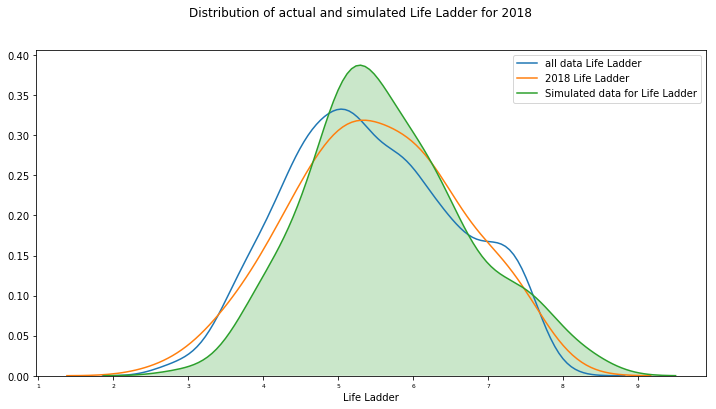

In [115]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

sns.distplot(df['Life Ladder'], hist=False, label="all data Life Ladder");
sns.distplot(df18['Life Ladder'],hist=False, label="2018 Life Ladder");
sns.kdeplot(LL, label="Simulated data for Life Ladder", shade=True)
plt.suptitle("Distribution of actual and simulated Life Ladder for 2018");

Text(0.5, 0.98, 'Simulated and actual data for Happiness Score for 2018')

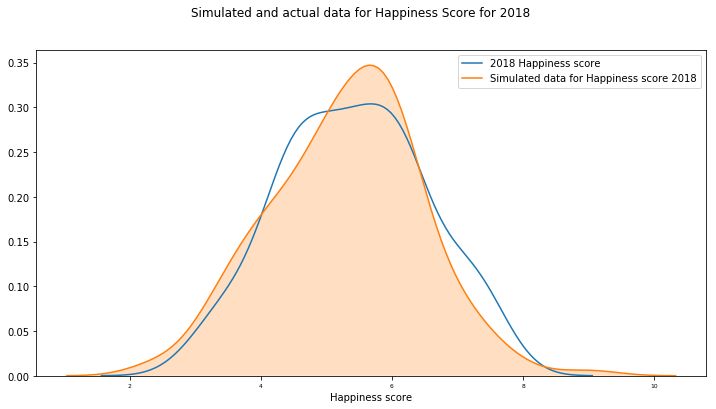

In [116]:
sns.distplot(df6['Happiness score'],hist=False, label="2018 Happiness score");
sns.kdeplot(HS, label="Simulated data for Happiness score 2018", shade=True)

plt.suptitle("Simulated and actual data for Happiness Score for 2018")

Note that while the life ladder data can be simulated like this, the happiness score is calculated based on the other variables so I don't think I should be directly simulating this. For here just to see what it looks like and how it relates to the life ladder. The happiness score is a bit left skewed.


# Log GDP per capita
Log GDP per capita from Table 2.1
Explained by: GDP per capita from Figure 2.6

In [120]:
df['Log GDP per capita'].describe()

count    1676.000000
mean        9.222456
std         1.185794
min         6.457201
25%         8.304428
50%         9.406206
75%        10.193060
max        11.770276
Name: Log GDP per capita, dtype: float64

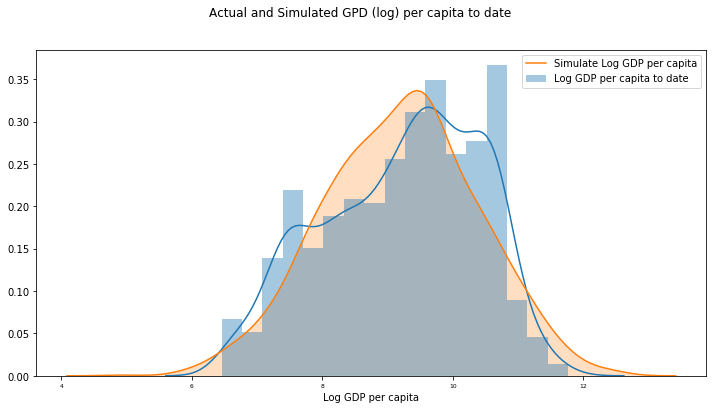

In [132]:
GDP=np.random.normal(9.222,1.18,1676)
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita to date")
sns.kdeplot(GDP,label="Simulate Log GDP per capita", shade=True)
plt.suptitle("Actual and Simulated GPD (log) per capita to date")
plt.legend;

In [123]:
df18['Log GDP per capita'].describe()

count    127.000000
mean       9.250394
std        1.186589
min        6.541033
25%        8.346278
50%        9.415703
75%       10.166517
max       11.453928
Name: Log GDP per capita, dtype: float64

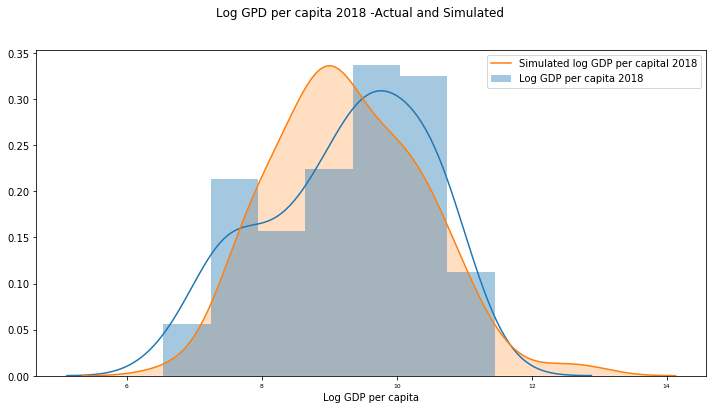

In [134]:
gdp18=np.random.normal(9.250,1.18,127)
sns.distplot(df18['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
sns.kdeplot(gdp18, shade=True, label="Simulated log GDP per capital 2018")
plt.legend()
plt.suptitle("Log GPD per capita 2018 -Actual and Simulated");

In [135]:
df6['Explained by: GDP per capita'].describe()

count    156.000000
mean       0.905108
std        0.398357
min        0.000000
25%        0.602895
50%        0.959741
75%        1.232124
max        1.684094
Name: Explained by: GDP per capita, dtype: float64

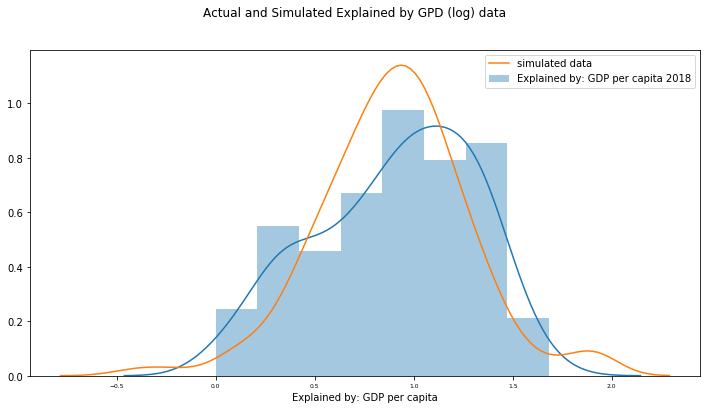

In [136]:
ExpGDP= np.random.normal(0.905,0.398,156)
sns.distplot(df6['Explained by: GDP per capita'].dropna(), label="Explained by: GDP per capita 2018")
sns.kdeplot(ExpGDP, label="simulated data")
plt.suptitle("Actual and Simulated Explained by GPD (log) data")
plt.legend();

In [137]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

# Healthy Life Expectancy
- Healthy life expectancy at birth from Table 2.1
- Explained by: Healthy life expectancy from Figure 2.6

In [141]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [142]:
df['Healthy life expectancy at birth'].describe()

count    1676.000000
mean       63.111971
std         7.583622
min        32.299999
25%        58.299999
50%        65.000000
75%        68.300003
max        76.800003
Name: Healthy life expectancy at birth, dtype: float64

In [144]:
HLE=np.random.normal(63.11,7.583,1676)

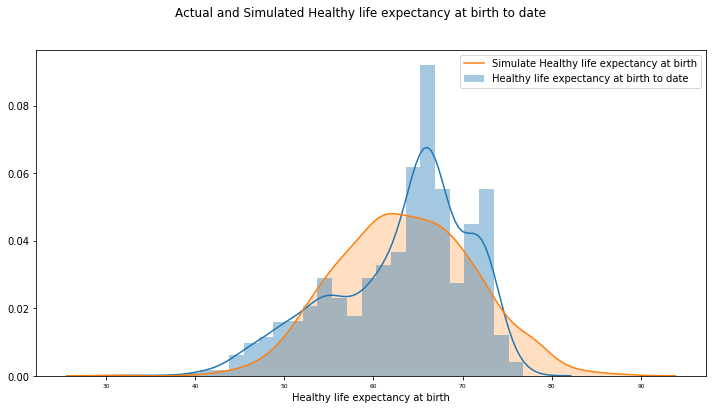

In [145]:
sns.distplot(df['Healthy life expectancy at birth'].dropna(), label="Healthy life expectancy at birth to date")
sns.kdeplot(HLE,label="Simulate Healthy life expectancy at birth", shade=True)
plt.suptitle("Actual and Simulated Healthy life expectancy at birth to date")
plt.legend;

In [146]:
df6['Explained by: Healthy life expectancy'].describe()

count    156.000000
mean       0.725258
std        0.242144
min        0.000000
25%        0.548066
50%        0.788698
75%        0.881603
max        1.140899
Name: Explained by: Healthy life expectancy, dtype: float64

In [147]:
EHLE=np.random.normal(0.7253,0.242,156)


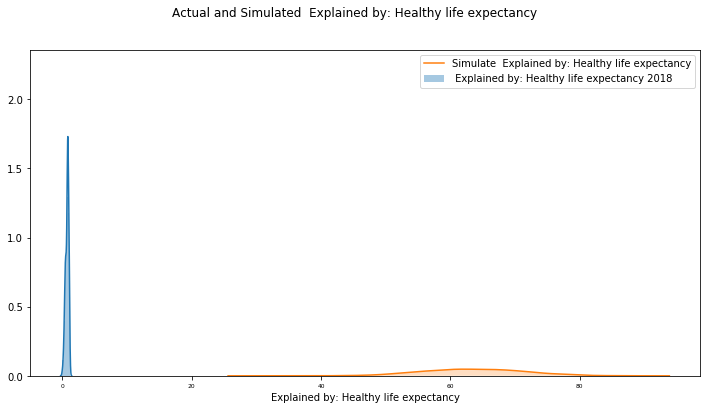

In [148]:
sns.distplot(df6['Explained by: Healthy life expectancy'].dropna(), label=" Explained by: Healthy life expectancy 2018")
sns.kdeplot(HLE,label="Simulate  Explained by: Healthy life expectancy", shade=True)
plt.suptitle("Actual and Simulated  Explained by: Healthy life expectancy")
plt.legend;

# HERE!

# Here! run everything to here.
This is where I leave it for now.
as expected Health life expectancy variables are not normally distributed.
There are large variations within reasons.
Look at pareto and power distributions.


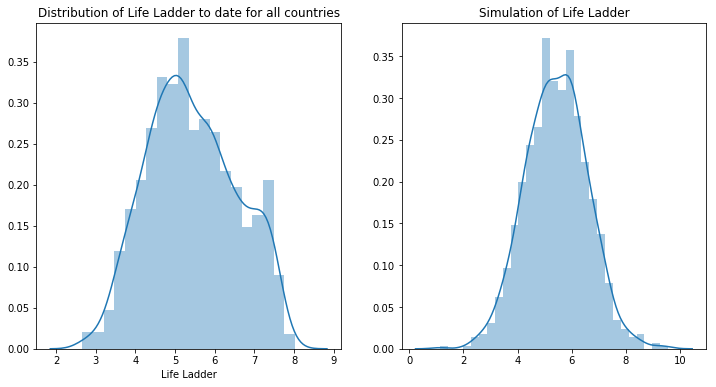

In [236]:

f,axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(df['Life Ladder'].dropna(), ax=axes[0])
axes[0].set_title("Distribution of Life Ladder to date for all countries");
sns.distplot(s, ax=axes[1])
axes[1].set_title("Simulation of Life Ladder");

## Regions and Countries

In [246]:
df['Life Ladder'].describe()


count    1667.000000
mean        5.438695
std         1.124814
min         2.661718
25%         4.608125
50%         5.326222
75%         6.275756
max         8.018934
Name: Life Ladder, dtype: float64

In [249]:
df.groupby('Region').describe()

Year                                         \
                                 count         mean       std     min     25%   
Region                                                                          
Australia and New Zealand         24.0  2012.208333  3.945048  2005.0  2009.5   
Central and Eastern Europe       341.0  2012.360704  3.634246  2005.0  2009.0   
Eastern Asia                      50.0  2012.160000  3.765363  2005.0  2009.0   
Latin America and Caribbean      255.0  2011.976471  3.756285  2005.0  2009.0   
Middle East and Northern Africa  196.0  2012.443878  3.549202  2005.0  2010.0   
North America                     26.0  2011.961538  3.883099  2005.0  2009.0   
Southeastern Asia                102.0  2012.068627  3.805311  2006.0  2009.0   
Southern Asia                     78.0  2012.153846  3.675390  2005.0  2009.0   
Sub-Saharan Africa               364.0  2012.513736  3.648816  2006.0  2010.0   
Western Europe                   231.0  2012.489177  3.749622  2005.0  2010.0   

                                                         Life Ladder  \
                                    50%      75%     max       count   
Region                                                                 
Australia and New Zealand        2012.5  2015.25  2018.0        24.0   
Central and Eastern Europe       2013.0  2015.00  2018.0       341.0   
Eastern Asia                     2012.0  2015.00  2018.0        50.0   
Latin America and Caribbean      2012.0  2015.00  2018.0       255.0   
Middle East and Northern Africa  2012.0  2015.00  2018.0       196.0   
North America                    2012.0  2015.00  2018.0        26.0   
Southeastern Asia                2012.0  2015.00  2018.0       102.0   
Southern Asia                    2012.0  2015.00  2018.0        78.0   
Sub-Saharan Africa               2013.0  2016.00  2018.0       364.0   
Western Europe                   2013.0  2016.00  2018.0       231.0   

                                           ...  \
                                     mean  ...   
Region                                     ...   
Australia and New Zealand        7.310778  ...   
Central and Eastern Europe       5.312654  ...   
Eastern Asia                     5.472610  ...   
Latin America and Caribbean      6.005356  ...   
Middle East and Northern Africa  5.399168  ...   
North America                    7.265042  ...   
Southeastern Asia                5.342963  ...   
Southern Asia                    4.587340  ...   
Sub-Saharan Africa               4.262331  ...   
Western Europe                   6.808758  ...   

                                Most people can be trusted, WVS round 2005-2009  \
                                                                            75%   
Region                                                                            
Australia and New Zealand                                              0.511602   
Central and Eastern Europe                                             0.247649   
Eastern Asia                                                           0.496780   
Latin America and Caribbean                                            0.154984   
Middle East and Northern Africa                                        0.308731   
North America                                                          0.418500   
Southeastern Asia                                                      0.486311   
Southern Asia                                                          0.206897   
Sub-Saharan Africa                                                     0.171558   
Western Europe                                                         0.534297   

                                           \
                                      max   
Region                                      
Australia and New Zealand        0.511602   
Central and Eastern Europe       0.288842   
Eastern Asia                     0.496780   
Latin America and Caribbean      0.284393 

#### Working with df and WH dataframes

In [251]:
df['Life Ladder'].describe()

count    1667.000000
mean        5.438695
std         1.124814
min         2.661718
25%         4.608125
50%         5.326222
75%         6.275756
max         8.018934
Name: Life Ladder, dtype: float64

In [29]:
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]


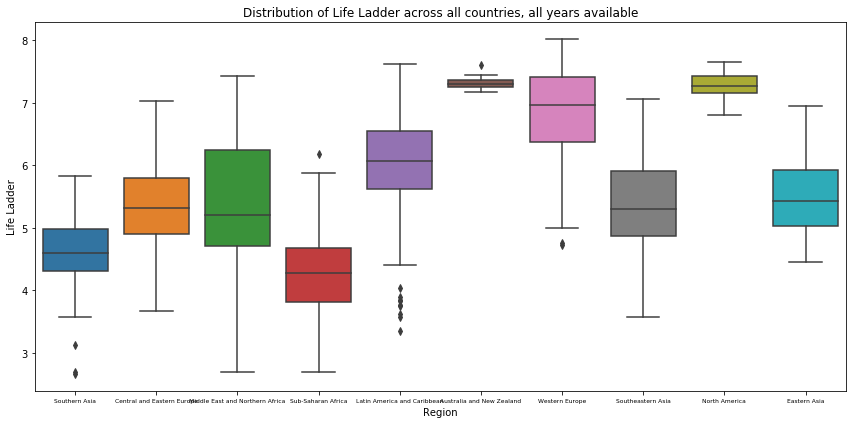

In [282]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Life Ladder'])
plt.title("Distribution of Life Ladder across all countries, all years available")


plt.tight_layout()
plt.show()

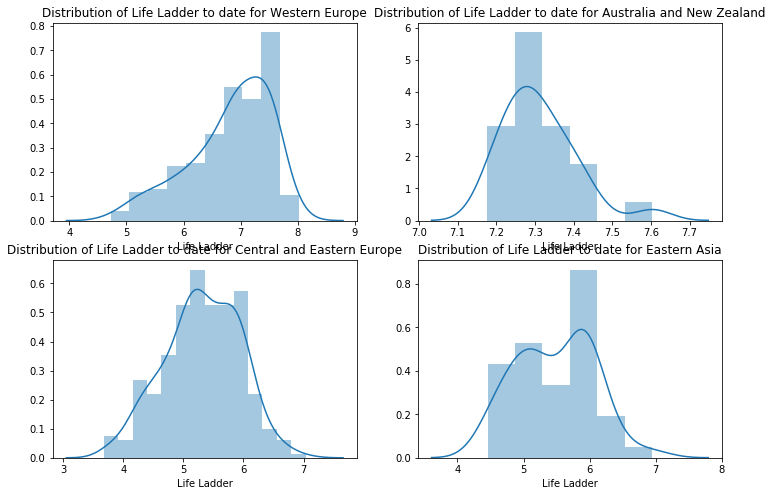

In [260]:
f,axes = plt.subplots(2,2,figsize=(12,8))
sns.distplot(WE['Life Ladder'].dropna(), ax=axes[0,0])
axes[0,0].set_title("Distribution of Life Ladder to date for Western Europe");
sns.distplot(ANZ['Life Ladder'].dropna(), ax=axes[0,1])
axes[0,1].set_title("Distribution of Life Ladder to date for Australia and New Zealand");
sns.distplot(CEE['Life Ladder'].dropna(), ax=axes[1,0])
axes[1,0].set_title("Distribution of Life Ladder to date for Central and Eastern Europe");
sns.distplot(EA['Life Ladder'].dropna(), ax=axes[1,1])
axes[1,1].set_title("Distribution of Life Ladder to date for Eastern Asia");

### Incomes and Happiness levels:

Higher national incomes go together with higher average life satisfaction. Countries with higher average national incomes tend to have higher average life satisfaction scores. The scatterplot below shows how higher levels of satisfaction or happiness are associated with higher levels of Log GDP per capita. This will need to be taken into consideration when simulating these two variables. 

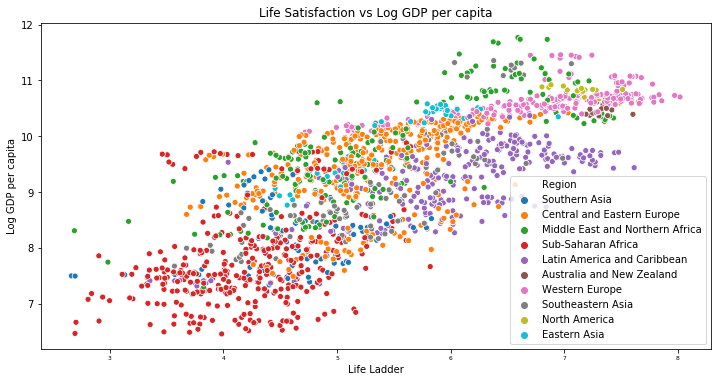

In [23]:
sns.scatterplot(y = df['Log GDP per capita'],x= df['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita");

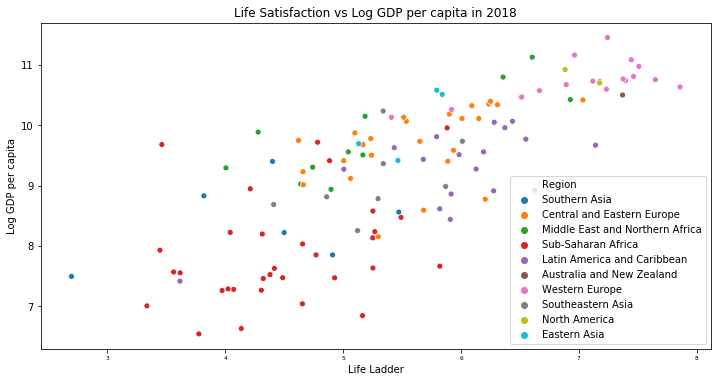

In [45]:
sns.scatterplot(y = df2018['Log GDP per capita'],x= df2018['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita in 2018");

```python
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]
```


# GDP per capita

The GDP per capita in the World Happiness Report dataset are in purchasing power parity at constant 2011 international dollar prices which are mainly from the World Development Indicators in 2018. The log of the GDP figures is taken.

Per capita GDP is the Total Gross Domestic Product for a country divided by its population. It breaks down a country's GDP per person and is considered a universal measure for gauging the prosperity of nations.

Regular “nominal” GDP divided by the current population is fine when looking at one point in time in a single country. “Nominal” means GDP per capita is measured in current dollars. When looking to compare GDP per capita between countries then the purchasing power parity GDP must be used. 

#### References

<https://ec.europa.eu/eurostat/statistics-explained/index.php/Beginners:GDP_-_Comparing_GDP:_growth_rate_and_per_capita#How_can_the_GDP_of_countries_of_different_sizes_be_compared.3F>

<https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848>


<https://www.investopedia.com/terms/p/per-capita-gdp.asp>

<http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf>

Per capita GDP is a unimodal but skewed distribution

In [49]:
df2018.head()
df2018.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,133.0,133.000000,125.000000,133.000000,130.000000,133.000000,125.000000,126.000000,132.000000,132.000000,...,0.0,121.000000,130.000000,0.0,9.000000,17.000000,49.000000,39.000000,48.000000,50.000000
mean,2018.0,5.504264,9.266138,0.810440,64.808076,0.785587,-0.027913,0.731127,0.707636,0.294949,...,NaN,0.383993,0.459551,NaN,0.399879,0.279307,0.255859,0.261581,0.271363,0.236869
std,0.0,1.110096,1.184088,0.116804,6.686527,0.118920,0.156427,0.188487,0.112077,0.087669,...,NaN,0.081460,0.125984,NaN,0.135524,0.115659,0.124502,0.144652,0.168913,0.161875
min,2018.0,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.106871,...,NaN,0.211000,0.200969,NaN,0.176535,0.066020,0.048720,0.075872,0.048552,0.031518
25%,2018.0,4.661909,8.439203,0.739841,59.624999,0.716484,-0.149109,0.687893,0.638779,0.220041,...,NaN,0.325600,0.367298,NaN,0.290300,0.223553,0.179177,0.152993,0.147861,0.120060
50%,2018.0,5.471554,9.434348,0.835890,66.400002,0.797066,-0.038008,0.793425,0.725434,0.287869,...,NaN,0.368750,0.433333,NaN,0.407623,0.282587,0.235000,0.230289,0.202638,0.185033
75%,2018.0,6.276443,10.184117,0.908726,69.225002,0.877404,0.065061,0.851654,0.792829,0.359349,...,NaN,0.432000,0.542773,NaN,0.478149,0.335200,0.302642,0.364926,0.397838,0.345812
max,2018.0,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836,...,NaN,0.626000,0.786517,NaN,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


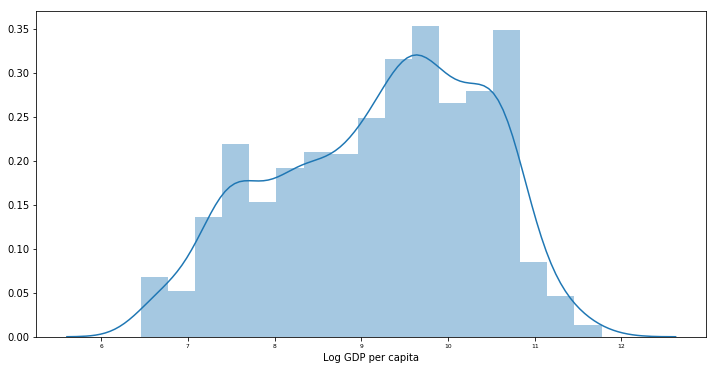

In [41]:
sns.distplot(df['Log GDP per capita'].dropna())

In [15]:
df.head(2)

,Country,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Southern Asia,2008.0,3.723590,7.16869,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Southern Asia,2009.0,4.401778,7.33379,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df['Log GDP per capita'].describe()

count    1647.000000
mean        9.213981
std         1.182664
min         6.457201
25%         8.298149
50%         9.400388
75%        10.166996
max        11.770276
Name: Log GDP per capita, dtype: float64

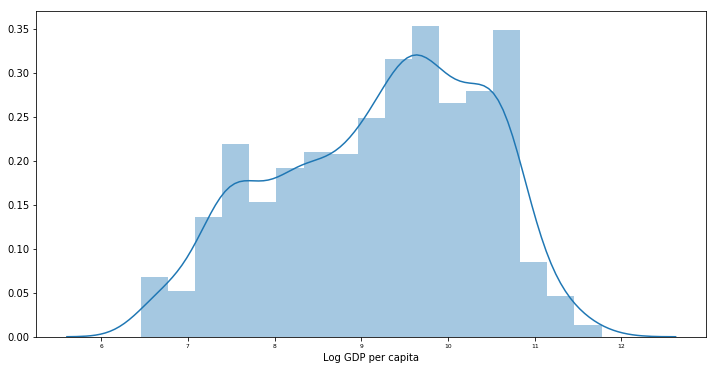

In [17]:
plt.rcParams["figure.figsize"] = (12,6)
sns.distplot(df['Log GDP per capita'].dropna());

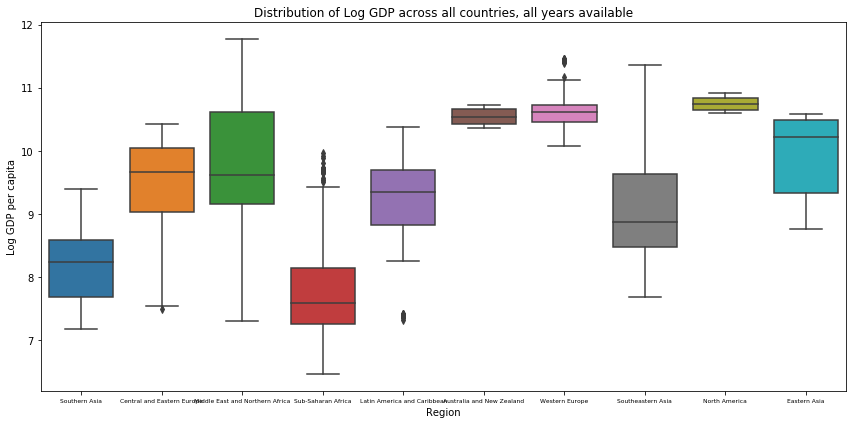

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Log GDP per capita'])
plt.title("Distribution of Log GDP across all countries, all years available")


plt.tight_layout()
plt.show()

From the above boxplots by geographic regions it is evident that there is great variations between regions in the distribution of GDP per capita.

## Social Support



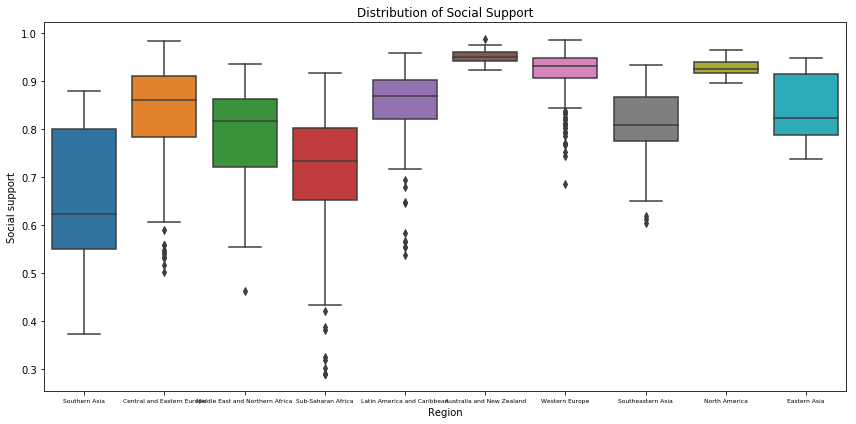

In [285]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Social support'])
plt.title("Distribution of Social Support")


plt.tight_layout()
plt.show()

## Freedom to make life choices

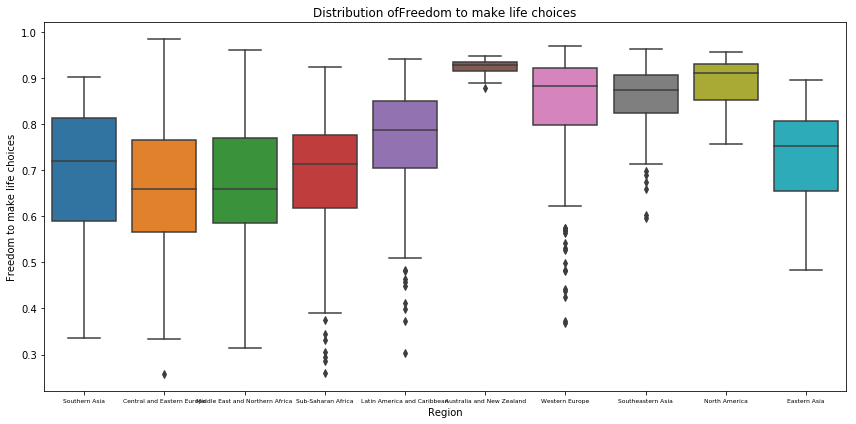

In [286]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Freedom to make life choices'])
plt.title("Distribution ofFreedom to make life choices")


plt.tight_layout()
plt.show()

## Healthy Life Expectancy at birth


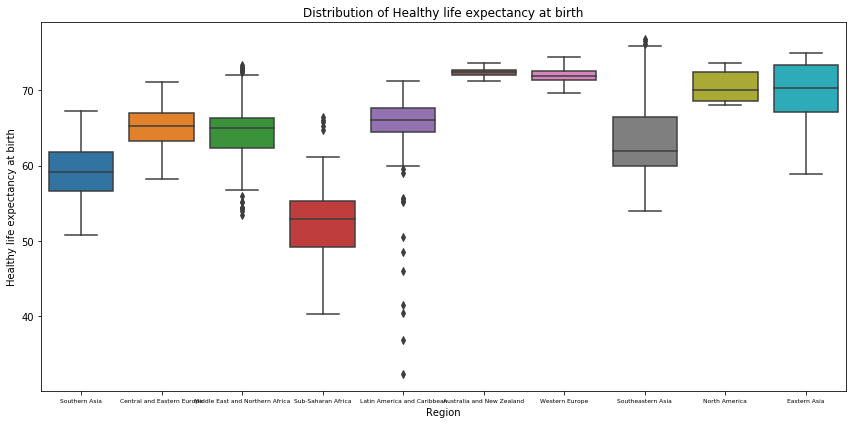

In [287]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Healthy life expectancy at birth'])
plt.title("Distribution of Healthy life expectancy at birth")


plt.tight_layout()
plt.show()

## Generosity


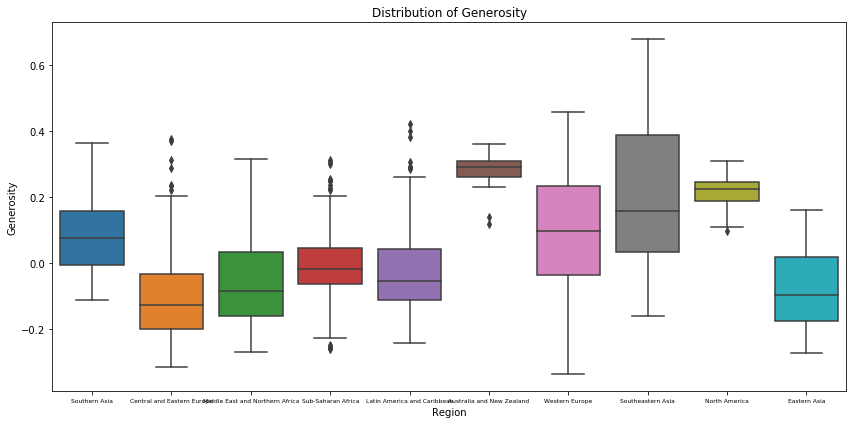

In [288]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Generosity'])
plt.title("Distribution of Generosity")


plt.tight_layout()
plt.show()

## Perceptions of Corruption

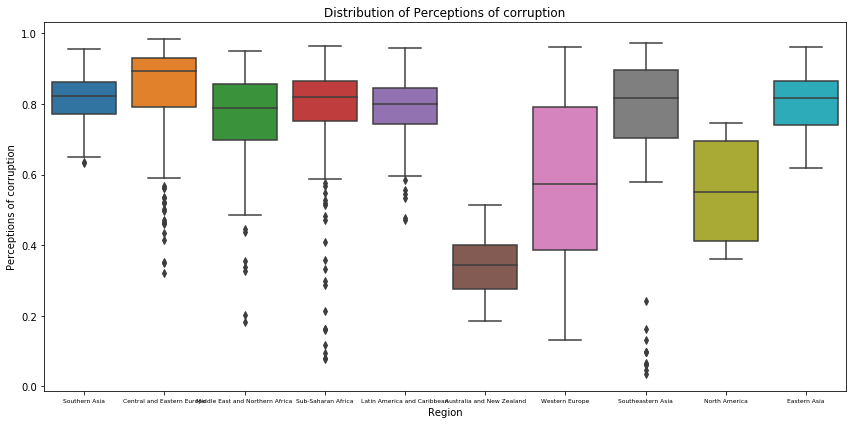

In [289]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Perceptions of corruption'])
plt.title("Distribution of Perceptions of corruption")


plt.tight_layout()
plt.show()

## GINI index (World Bank estimate)

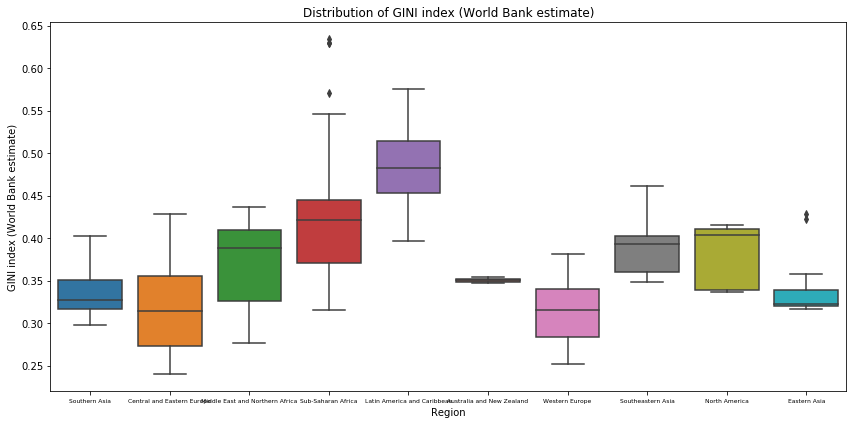

In [290]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['GINI index (World Bank estimate)'])
plt.title("Distribution of GINI index (World Bank estimate)")


plt.tight_layout()
plt.show()

## GINI index (World Bank estimate), average 2000-16

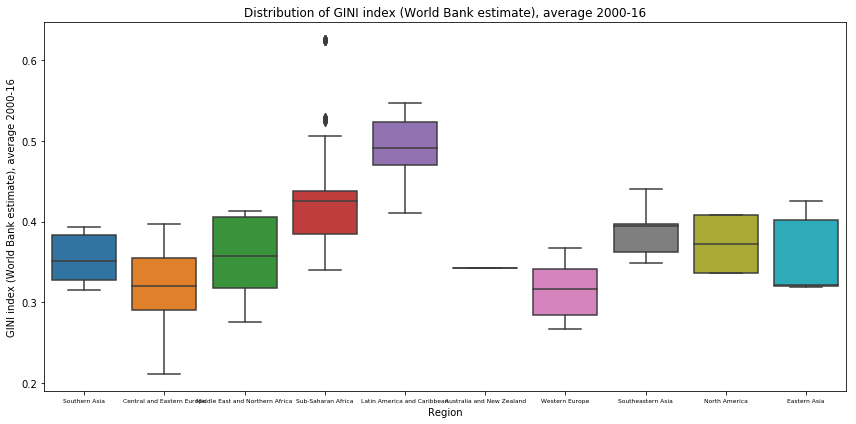

In [292]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['GINI index (World Bank estimate), average 2000-16'])
plt.title("Distribution of GINI index (World Bank estimate), average 2000-16")


plt.tight_layout()
plt.show()

## gini of household income reported in Gallup, by wp5-year

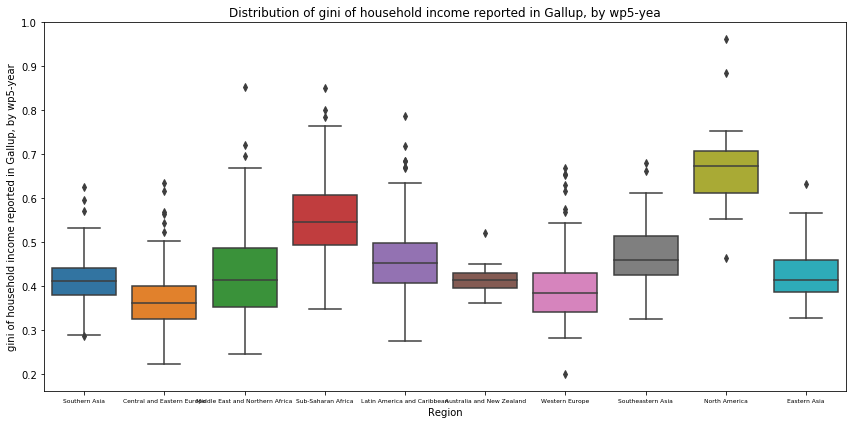

In [293]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['gini of household income reported in Gallup, by wp5-year'])
plt.title("Distribution of gini of household income reported in Gallup, by wp5-yea")


plt.tight_layout()
plt.show()

df.head()

```python
# filter for a country
whr18.loc[whr18.loc[:,'Country']=='Ireland']
# sort by values of Life Ladder
WH2018.sort_values('Life Ladder', ascending=False)
```

CR.sort_values('Score', ascending=False).head(7)

WH2018.sort_values('Life Ladder', ascending=False).head(7)

whr18.head(3)
whr18.tail(3)

whr18['Happiness score'].describe()

WH2018['Life Ladder'].describe()

# HERE!
#### Western Europe - Region 1
Simulate a dataset for a region containing 20 countries with data simulated to correspond to the distribution of the variables in Western Europe.
There are too little observations this way. Look at bootstrap or amalgamate regions with simular statistics.


```
WE = CR.loc[CR.loc[:,'Region']=='Western Europe']
# drop na (North Cyprus)
WE.dropna()
```

```python
# loop through each of the countries in the region and plot the distributions
Z = WE.dropna() # set Z to be western Europe countries
for i in Z.iloc[:, 3:]:
    print(Z[i].describe())
    # plot a distogram
    sns.distplot(Z[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
```

In [44]:
whr18.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978


In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,4))

## Health Life Expectancy by Region

df.columns

x = df['Health (Life Expectancy)']
sns.distplot(x)
plt.title("Distribution of Life Expectancy variable for all countries")

df.groupby('Region').describe()

for i in df.iloc[:, 3:]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(df[i])
    # plot a distogram
    sns.distplot(df[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()

I could simulate the data for the 157 countries. Sort them so that they are in the same rank as the original dataset.
There are 10 different regions which will likely have different distributions. 


```python
# create a list of country names by appending number to Country
# setup empty list for country
country=[]
# use for loop to append a number to 'country'
for i in range(1,157):
#i=np.arange(1,141)
  country.append('Country'+str(i))
#set up empty list for region
region=[]
# loop through, append a number to 'Region'
for i in range(1,11):
    region.append('Region'+str(i))
print(country)
print(region)
```

```python
country=[]
region=[]
for i in range(1,11):
    region.append('Region'+str(i))
    for j in range(1,15):
        country.append('Country'+str(i))
#print(region)
print(country) 
```

In [75]:
len(country)

156

In [189]:
x = np.random.normal(8.603,1.469,156)# a simulated normal distribution

In [192]:
d = {'Country': country,'samplevariable':x}

In [193]:
Simulate = pd.DataFrame(data=d)

In [194]:
Simulate.head()

,Country,samplevariable
0,Country1,8.764537
1,Country2,9.261981
2,Country3,9.806815
3,Country4,6.106897
4,Country5,5.164667


df.groupby('Region').mean()

### Plotting the distribution of the GDP per capita from the Happy Planet Index 2016
I am looking at cross section of GDP per capita rather than the distribution over time.
The distribution of GPD per capita here is very concentrated in the 0 to about 6000 per capita range. It has a very long tail to the right over to 120000 per capita which looks like a log normal shape.
Most countries have a lower rather than a higher GDP per capita.

The pareto distribution is used to model gdp per capita. The 80:20 rule
The right tail of income and wealth distributions often resemble pareto distributions.
<https://economics.mit.edu/files/10517>


sns.distplot(hpi16['GDPperCap'], bins=20)
plt.title("Happy Planet Index GDP per capita 2016");

This shows that most countries are quite poor.

In [11]:
hpi16['GDPperCap'].describe()

count       140.000000
mean      13911.068748
std       19746.184793
min         244.196486
25%        1628.064475
50%        5691.063252
75%       15159.065819
max      105447.093241
Name: GDPperCap, dtype: float64

### Get the log of GDP per capita and plot the distribution

```
### get the log of GDP per capita
hpi16['Log_GDP_perCap']= np.log(hpi16['GDPperCap'])
```

hpi16.describe()

```
# plot the distibution of the log of GDP per capita
sns.distplot(hpi16['Log_GDP_perCap'])
# plot the simulated normal distribution using mean and std of the log of GDP per capita
#sns.distplot(np.random.normal(8.603492,1.469307,140))
```

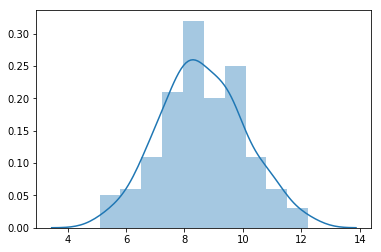

In [15]:
sns.distplot(np.random.normal(8.603,1.4693,140))

### Simulate the distribution

```
# plot the GDP per capita
sns.distplot(hpi16['GDPperCap'], bins=20)
plt.title("Happy Planet Index GDP per capita 2016");
```

sns.distplot(np.random.pareto(8.603, 1000));

<a id="worldhappiness"></a>
*** 


# The World Happiness Report

The World Happiness report has an excel spreadsheet with data for the the years up to 2016 in a sheet called 'Data for Table2.1'. The actual data for 2016 is in a sheet called 'Figure2.2'.
These correspond with the data from the reports.
There are reports from 2012 to 2019. I am using 2016 as the Happy Planet Index was calculated for 2016.(based on 2015).


There are annual reports from 2012 up to 2019 which report for the previous year.
There is a spreadsheet included for chapter 2 which contains the total data to date in the first sheet and the annual data from which the World Happiness scores are calculated in other sheets.

The larger sheets contain a column for the Log GDP per Capita with data that goes back to 2007 I think.
The latest file for the World Happiness Report of 2019 includes more up to data GDP data for 2016 than in the 2016 file. 

### World Happiness Report Figure2.2 data for 2016 report
The sheet called 'Figure2.2' contains the data for the 2016 index.
The log gdp per capita figures were estimated or forecast from the previous year as the figures were not yet available at the time of the report being prepared in 2016.


```# write to csv
whr_19_data.to_csv("WHR_Data_2019report.csv")
whr_16_data.to_csv("WHR_Data_2016report.csv")
```


`!ls`

data16=pd.read_csv("WHR_Data_2016report.csv", index_col=0)
data19= pd.read_csv("WHR_Data_2019report.csv", index_col=0)

## GDP

#### The World Happiness Report 2016:
Log GDP per capita is in terms of purchasing power parity (PPP) adjusted to constant 2011 international dollar prices taken from the December 22, 2015 release of the World Development Indicators (WDI).

sns.distplot(whi16['Explained by: GDP per capita']);

#### Data up to 2016 and data up to 2019

In [39]:
data16.head(2)

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183399,0.881686,...,NaN,NaN,0.476129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204900,0.850035,...,NaN,NaN,0.440242,0.286315,NaN,NaN,NaN,NaN,NaN,NaN


f,axes = plt.subplots(1,2,figsize=(12,4))
sns.distplot(data16['Log GDP per capita'].dropna(), ax=axes[0])
axes[0].set_title("Log GDP p/c to 2016");
sns.distplot(data19['Log GDP per capita'].dropna(), ax=axes[1])
axes[1].set_title("Log GDP p/c to 2019");
plt.suptitle("Log GDP per capita to 2016 and 2019");

#### Some statistics

data16['Log GDP per capita'].describe()

data19['Log GDP per capita'].describe()

Looking at the Happy Planet Index data for 2016. This contains the `GDP/capita ($PPP)`.


hpi16.head()

sns.distplot(hpi16['Log_GDP_perCap'])
plt.title("Log of GDP per capita")
plt.suptitle("Happy Planet Index 2016");

In [49]:
hpi16['Log_GDP_perCap'].describe()

count    140.000000
mean       8.603492
std        1.469307
min        5.497973
25%        7.395039
50%        8.646650
75%        9.626348
max       11.565965
Name: Log_GDP_perCap, dtype: float64

## Simulating log GDP per capita.
Taking the means and standard deviations, simulating a normal distribution.  This clearly does not resemble the distribution of the actual log GDP per capita across the countries above.

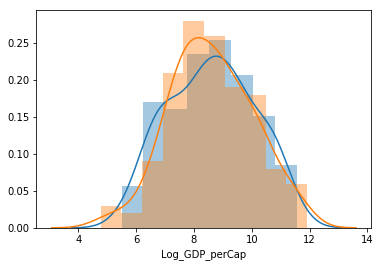

In [51]:
sns.distplot(hpi16['Log_GDP_perCap']) # the actual distribution
sns.distplot(np.random.normal(8.603,1.469,140))# a simulated normal distribution

In [92]:
x = np.random.normal(8.603,1.469,140)# a simulated normal distribution

hpi16.head()

### Average Life Expectancy

This is a left skewed distribution and is not normally distributed.
The mean is less than the median

The three most commonly used transformatiosn for quantitative data are the logarithm, the square root and the reciprocal. These are called variance_stabilising.

Pareto and Power distributions.

sns.distplot(hpi16['Average_Life_Expectancy'], bins=30);

sns.distplot(np.log10(hpi16['Average_Life_Expectancy']))

sns.boxplot(hpi16['Average_Life_Expectancy'])

hpi16['Average_Life_Expectancy'].describe()

a,m = 71,50
s=(np.random.pareto(a,140)+1)*m
sns.distplot(s)

s= np.random.uniform(48.91,83.572,140)
sns.distplot(s)

a=76
samples =1400
s=np.random.power(a,samples)
sns.distplot(s)

In [162]:
s

array([0.9918, 0.998 , 0.9989, ..., 0.9871, 0.9958, 0.9996])

hpi16.groupby(['Region','Average_Life_Expectancy']).sum()

y= np.random.normal(70.925,8.725,140)#
sns.distplot(y)